# Because of new collection methods, item prices will drop

<img src="https://vignette.wikia.nocookie.net/2007scape/images/1/14/Harvesting_herbiboar.gif/revision/latest?cb=20170908160803" style="float: right; margin: 0 0 10px 10px;">

On the 7<sup>th</sup> of September 2017, a new update was released for the game Runescape. This update added a new island to the game called Fossil Island. This island sports a few new ways to train the skills "Hunter" and "Mining".

A new boar was added to the game called the Herbiboar. To catch this boar, you will need to play a minigame-like activity called trekking. You need to track this boar from one hidey hole to the next by following its tracks. When you have found the boar, you can attack and stun it. The Herbiboar got its name because of its unique ability to grow herbs on its back. When it's stunned, you can pick these herbs and use them for potions or sell them to other players.

Before this update, you could only acquire these herbs by killing monsters, participating in minigames or grow yourself with the "Farming" skill. Our hypotheses states that the item prices of these herbs will drop, because there is an easier and faster way now to collect these herbs, which will result in an increase of herbs available on the market.

In the picture on the right you're seeing a Herbiboar being plucked for its precious herbs.

In [11]:
# Global imports
from datetime import datetime, timedelta, timezone
import json
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

print('Done!')

Done!


In [12]:
# Global functions
def load_json(name, identifier):
    df = pd.DataFrame(json.load(open(f'data/{name}.json')))
    df['id'] = identifier
    df['ts'] = pd.to_datetime(df['ts'],unit='ms')
    df[['buyingCompleted','buyingPrice', 'sellingCompleted', 'sellingPrice', 'overallPrice']] = df[['buyingCompleted','buyingPrice', 'sellingCompleted', 'sellingPrice', 'overallPrice']].apply(pd.to_numeric, downcast='signed')
    df.set_index('ts', inplace=True)
    return df

def resample_herb(collection, timespan):
    df = collection.resample(timespan).agg(dict(
        id='mean',
        buyingCompleted='sum',
        buyingPrice='mean',
        overallCompleted='sum',
        overallPrice='mean',
        sellingCompleted='sum',
        sellingPrice='mean'
    ))
    df[['id', 'buyingCompleted', 'buyingPrice', 'overallPrice', 'sellingCompleted', 'sellingPrice']] = df[['id', 'buyingCompleted', 'buyingPrice', 'overallPrice', 'sellingCompleted', 'sellingPrice']].apply(round).apply(pd.to_numeric, downcast='signed')
    return df

def save_fig(fig, name):
    fig.savefig(f'{figure_directory}/{name}.png', dpi=300)
    print('Image saved to the "figures" folder')
    
print('Done!')

Done!


In [13]:
# Global variables

# Please choose wide aspect ratios due to
# the wide range of dates
accuracy = 132

aspect_ratio = (21, 9)

labels = {
    199: 'Grimy Guam Leaf',
    201: 'Grimy Marrentill',
    203: 'Grimy Tarromin',
    205: 'Grimy Harralander',
    207: 'Grimy Ranarr Weed',
    209: 'Grimy Irit Leaf',
    211: 'Grimy Avantoe',
    213: 'Grimy Kwuarm',
    215: 'Grimy Cadantine',
    217: 'Grimy Dwarf Weed',
    219: 'Grimy Torstol',
    383: 'Raw Shark',
    3142: 'Raw Karambwan'
}

figure_directory = 'figures'

# Updates
herbiboar = pd.to_datetime("2017-09-07")
fishing = [pd.to_datetime("2017-07-06"), pd.to_datetime("2017-08-10")]

# Graphics
x_axis = 'Date'
y_axis = 'Price (in gp)'

update_color = '#c8c8c8'
update_linestyle = '--'

print('Done!')

Done!


In [14]:
if not os.path.exists(figure_directory):
    os.makedirs(figure_directory)
    
print('Done!')

Done!


In [15]:
# Import and parse all JSON files
# Store as Pandas data frame
grimy_avantoe = load_json('grimy-avantoe', 211)
grimy_cadantine = load_json('grimy-cadantine', 215)
grimy_dwarf_weed = load_json('grimy-dwarf-weed', 217)
grimy_guam = load_json('grimy-guam-leaf', 199)
grimy_harralander = load_json('grimy-harralander', 205)
grimy_irit = load_json('grimy-irit-leaf', 209)
grimy_kwuarm = load_json('grimy-kwuarm', 213)
grimy_marrentill = load_json('grimy-marrentill', 201)
grimy_ranarr = load_json('grimy-ranarr-weed', 207)
grimy_tarromin = load_json('grimy-tarromin', 203)
grimy_torstol = load_json('grimy-torstol', 219)

herbs = [grimy_avantoe, grimy_cadantine, grimy_dwarf_weed, grimy_guam,
         grimy_harralander, grimy_irit, grimy_kwuarm, grimy_marrentill,
         grimy_tarromin, grimy_ranarr, grimy_tarromin, grimy_torstol]

print('Done!')

Done!


## Dates

The RSBuddy API uses a JavaScript-like approach when it comes to timestamps. They are not stored as seconds, but milliseconds. Due to this (in)convenience, the Unix epochs need to be divided by a thousand and parsed as a datetime.

For future developers playing with this notebook, please don't edit the timestamps in the data frames directly. It is an impure operation which will lead to a quite frustrating road of state changes.

## Plotting

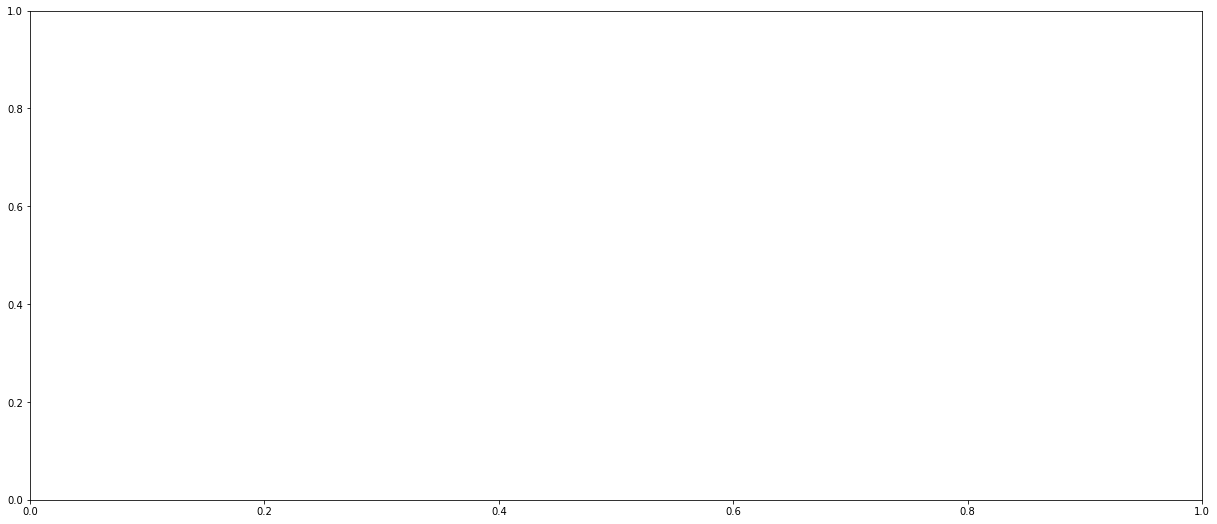

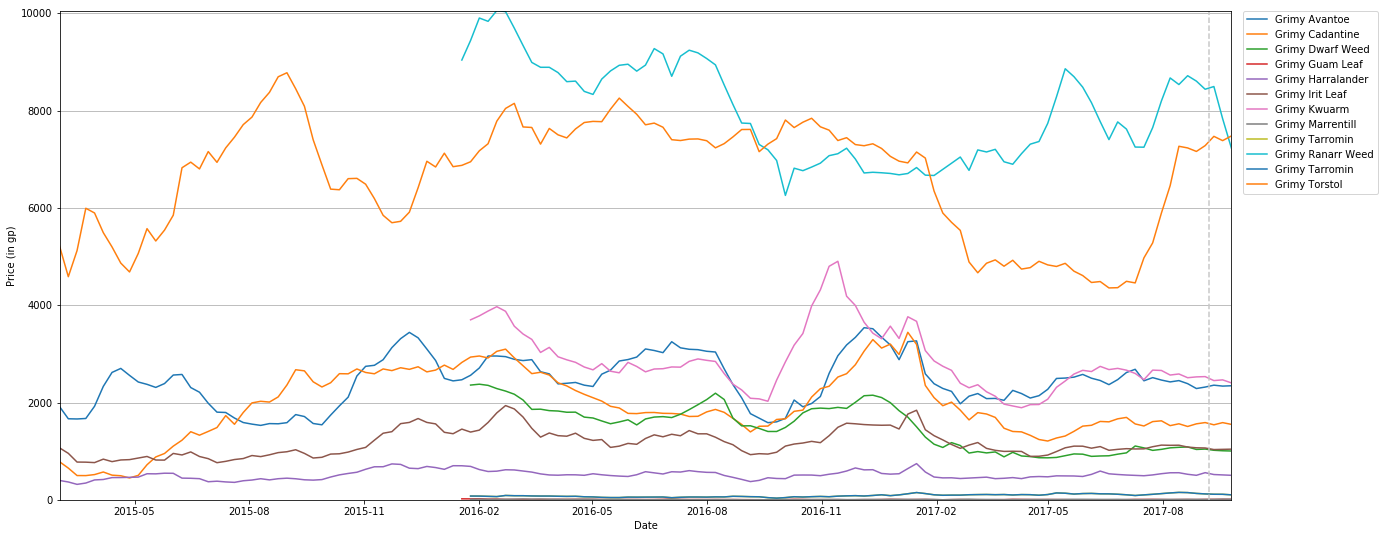

Image saved to the "figures" folder


In [16]:
fig, ax = plt.subplots(figsize=aspect_ratio)

def plot_line_graph(axis, collection):
    axis.plot(collection.index.values, collection['overallPrice'], label=labels[collection['id'][0]])

for herb in herbs:
    plot_line_graph(ax, resample_herb(herb, '1W-MON'))

ax.axvline(herbiboar, color=update_color, linestyle=update_linestyle)
ax.yaxis.grid(True)
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)
ax.autoscale(tight=True)
plt.show()

save_fig(fig, 'herbs')

The aftermath of this update is not what I have been expecting. I see that Ranarr weeds have lost almost twenty percent of their original value, while Torstol has almost doubled in price. There may be other factors in the game as to why this price increase has happened. An example of such a price increase may be an addition of a particularly difficult boss, another addition or balance tweak in the game or an increase in price because it has been cheap for such a long timespan. Based on the Herbiboar theory, I am going to say that this evidence is inconclusive with a strong leniance towards debunked. However, I want to explore what happened to the supply and demand of the Torstol and Ranarr weed.

Image saved to the "figures" folder
Image saved to the "figures" folder


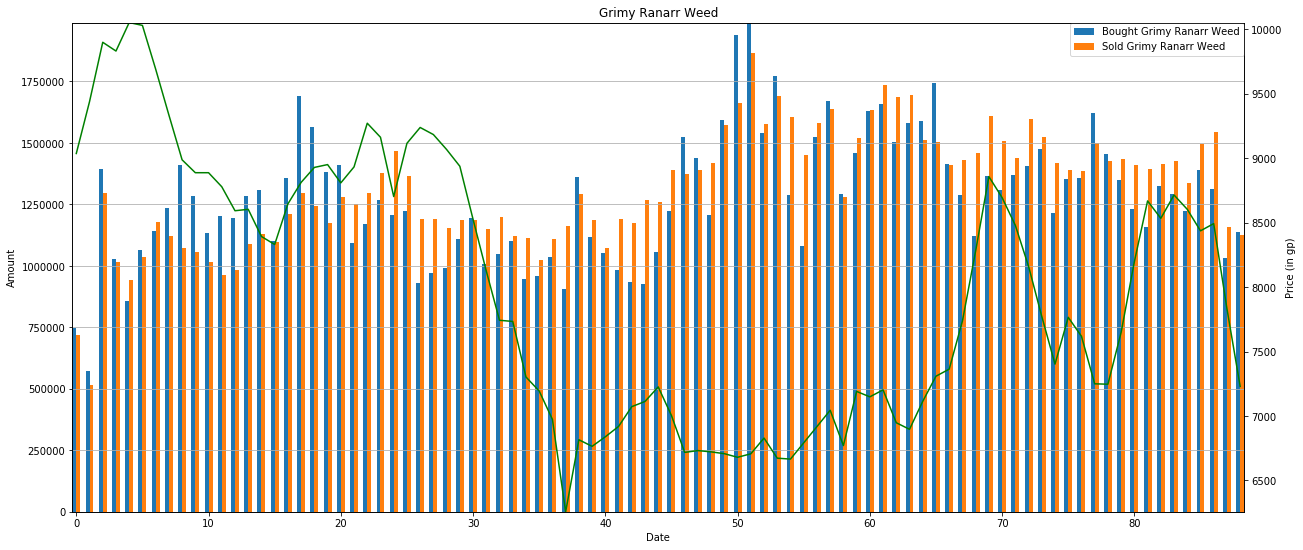

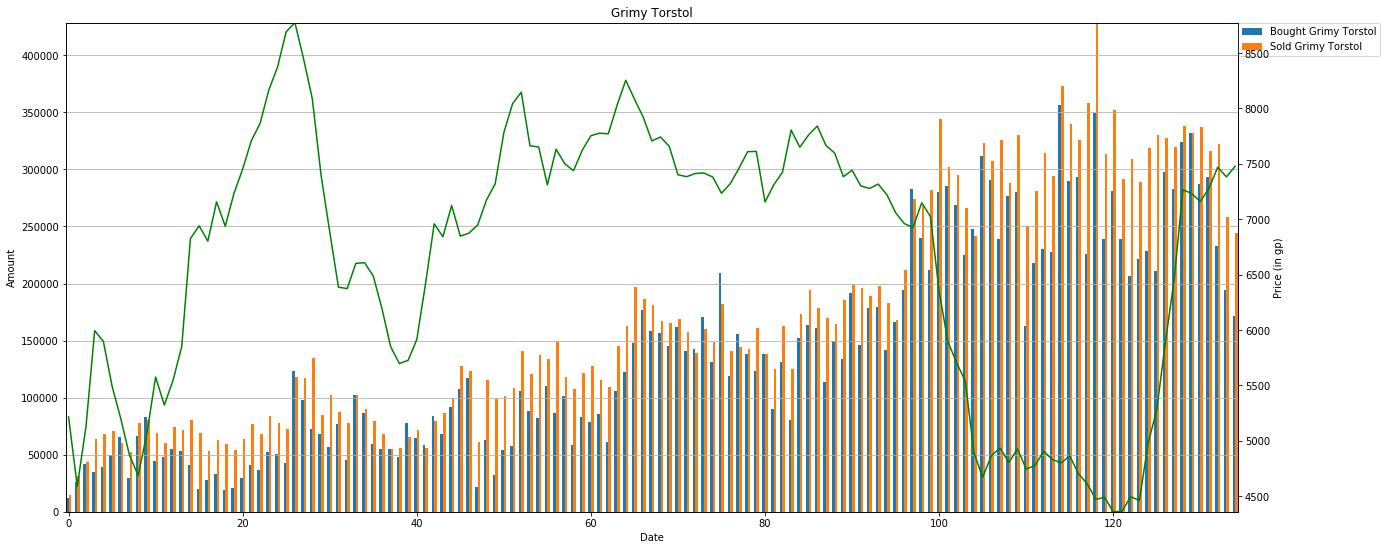

In [17]:
resampled_ranarr = resample_herb(grimy_ranarr, '1W-MON')
resampled_torstol = resample_herb(grimy_torstol, '1W-MON')
resampled = [
    {
        'data': resampled_ranarr,
        'title': 'Grimy Ranarr Weed',
        'fs': 'ranarr-weed-demand-supply'
    },
    {
        'data': resampled_torstol,
        'title': 'Grimy Torstol',
        'fs': 'torstol-demand-supply'
    }]

w = 0.3

def plot_bar_chart(collection, title, filename, w):
    x = np.arange(len(collection))
    fig, ax = plt.subplots(figsize=aspect_ratio)
    ax.yaxis.grid(True)
    ax.bar(x - w / 2, collection['buyingCompleted'], label=f'Bought {title}', width=w, align='center')
    ax.bar(x + w / 2, collection['sellingCompleted'], label=f'Sold {title}', width=w, align='center')
    ax.set_title(title)
    ax.set_xlabel(x_axis)
    ax.set_ylabel('Amount')
    ax.legend(bbox_to_anchor=(1,1), borderaxespad=0)
    ax.autoscale(tight=True)

    ax2 = ax.twinx()
    ax2.plot(x, collection['overallPrice'], color='g', label='Ranarr Weed Price')
    ax2.set_ylabel('Price (in gp)')
    ax2.autoscale(tight=True)
    
    save_fig(fig, 'ranarr-demand-supply')

for item in resampled:
    plot_bar_chart(item['data'], item['title'], item['fs'], w)


plt.show()

# Let's shine some light on other items

<img src="http://images-mediawiki-sites.thefullwiki.org/01/6/6/2/250709656933161.gif" style="float: left; margin: 0 10px 10px">

On the 6<sup>th</sup> of July 2017, the Fishing Guild was expanded with a new platform. The main activity on this platform is that you can catch fish called "Minnow". The main purpose of these Minnow is that you can trade them in at an Non-Playable Character (NPC) called Kylie to receive raw sharks, one of the best foods in the whole game. You can trade these Minnow in for a rate of 40:1. Meaning that you will get 1 raw shark for every 40 minnow you trade in.

Before this minigame, the player had to catch these sharks with a harpoon or via a method called "Barbarian fishing" (as shown in the illustration). These methods were substantially slower than the current method. 

Furthermore, there is a special fish in the game called a Karambwan. The thing that makes this fish special is that you are able to eat this fish the same instant you eat some other type of food, effectively doubling your healing abilities. This ability made this type of fish very powerful and popular with the Player-Killing (PK) community. However, this type of food was very expensive and tedious to retrieve, due to in-game mechanics. You had to buy special fish called Karambwanji and catch the Karambwan by putting the Karambwanji into a ceramic pot and waiting for the Karambwan to bite. The other methods was obtaining enough of a special type of in-game currency to buy the Karambwan directly from a seller, which was also extremely tedious.

RuneScape has been updated so that the Karambwanji now stack inside your inventory and the fishing spot for the Karambwan will not move at all, making it extremely easy and less tedious to catch them. This update took place on the 10<sup>th</sup> of August 2017.

In [18]:
raw_shark = load_json('raw-shark', 383)
raw_karambwan = load_json('raw-karambwan', 3142)

items = [raw_shark, raw_karambwan]

print('Done!')

Done!


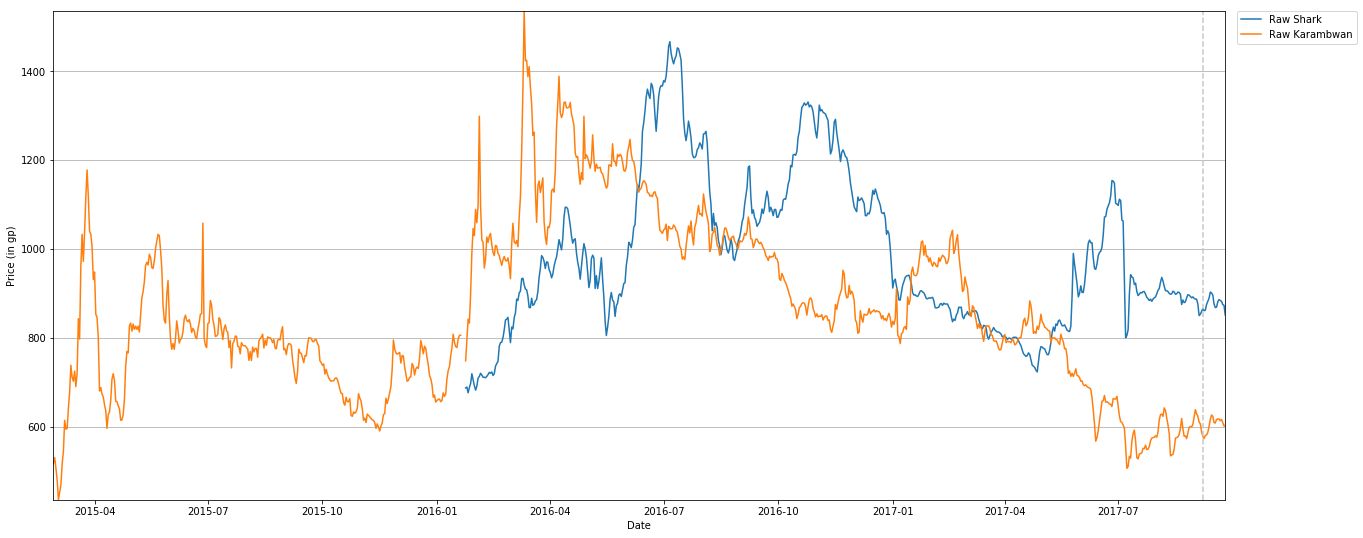

In [21]:
fig, ax = plt.subplots(figsize=aspect_ratio)

for fish in items:
    plot_line_graph(ax, resample_herb(fish, 'D'))

ax.axvline(herbiboar, color=update_color, linestyle=update_linestyle)
ax.yaxis.grid(True)
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)
ax.autoscale(tight=True)
plt.show()

# All-round conclusion

The all-round conclusion for the hypothesis "Because of new collection methods, item prices will drop" is that it is partially true, but that it does not apply to every item. When the Herbiboar update went live, the prices of Ranarr weeds dropped, while the prices of other herbs stayed at the same price or even have risen in price. The new fishing updates made the prices for sharks and Karambwans drop for a short while, but the prices restored themselves within a few days. Sadly, there is not enough data to have a definitive conclusion for the fishing updates. The updates were to recent to analyse their trend.